In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Exploratory Data Analysis for cc fradu data set.
https://www.kaggle.com/datasets/kartik2112/fraud-detection?datasetId=817870


# load up the Data and take a first look
- the fraud is labeled with 0,1 
- check how many rows and columns
- check data types
- check missing value
- show many null values

In [4]:
# load train data from archive/fradTrain.csv
traindf = pd.read_csv('archive/fraudTrain.csv')
traindf.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
traindf.shape

(1296675, 23)

In [11]:
# show data types and count of each column
traindf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

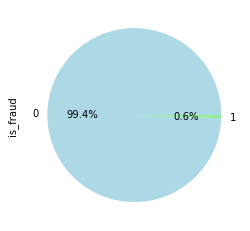

In [18]:
# pi chart of count is_fraud
traindf['is_fraud'].value_counts().plot(kind='pie', autopct='%1.01f%%', colors=['lightblue', 'lightgreen']);

In [15]:
# count null values
traindf.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## Checkpoint 1. What do we know so far?
- 23 columns related to individual financial transactions
- Less than 1% of the trasactions are fraud. typical for fraud.
- no nulls in data set.
- dont need unnameed column, i could go back and drop but I will keep all the work here for future reference.


### Further questions.
- how far apart are these transactions? what is the timeframe?
- is this data set inbalanced in more that one way? are ther more men than women or is all fraud in 1 city? etc..
- Are there any correlations that can be easily seen.
- What metrics do i need to be thinking about? am i more concerned with catching all the fraud even though i might flag some non fraudulent transactions? or am i ok misclassifying fraud so i do not interupt a users purchase on the live system?
    - if 99% is not fraud how reliable is my accuracy metric? 
    - I want to be thinking about Precision and F1. 
    - more to come on precision recall trade off.

- How many unique merchants and transactions per merchnats are there?





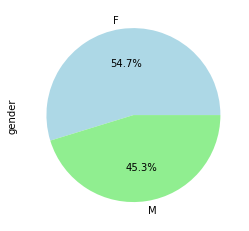

In [19]:
# pie chart of gender
traindf['gender'].value_counts().plot(kind='pie', autopct='%1.01f%%', colors=['lightblue', 'lightgreen']);



In [26]:
# count unique merchants 
traindf['merchant'].nunique()

693

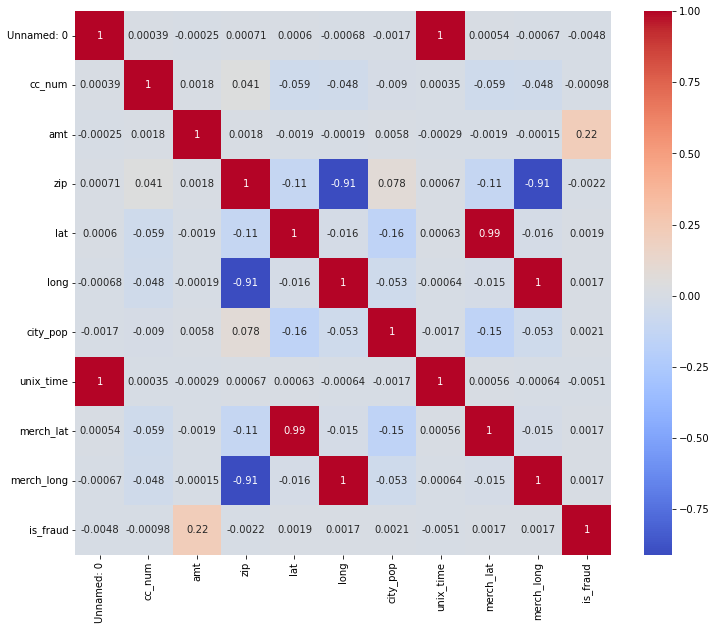

In [29]:
# plot color coded correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(traindf.corr(), annot=True, cmap='coolwarm');


In [30]:
# list top 5 correlated features with is_fraud
traindf.corr()['is_fraud'].sort_values(ascending=False).head(5)

is_fraud     1.000000
amt          0.219404
city_pop     0.002136
lat          0.001894
merch_lat    0.001741
Name: is_fraud, dtype: float64

In [31]:
# category uniques and counts
traindf['category'].value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

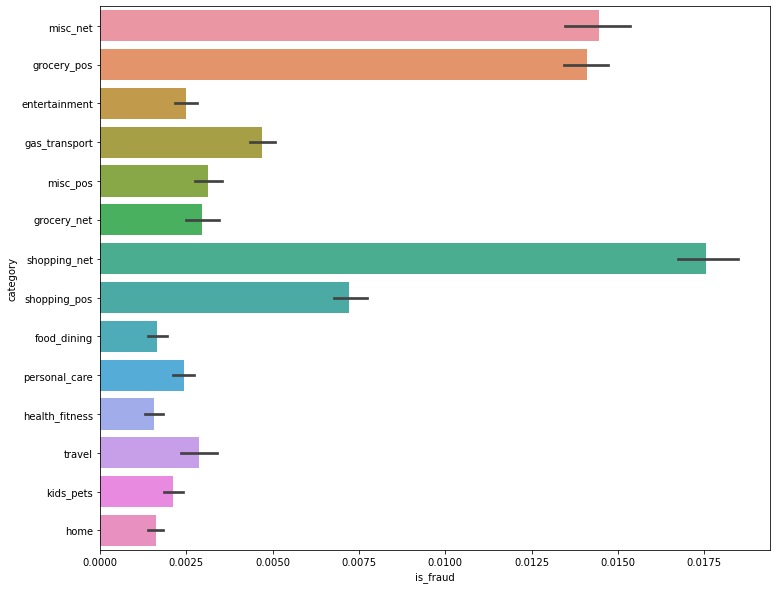

In [42]:
# plot is_fraud by category sns horizontal barplot
plt.figure(figsize=(12, 10))
sns.barplot(x='is_fraud', y='category', data=traindf);

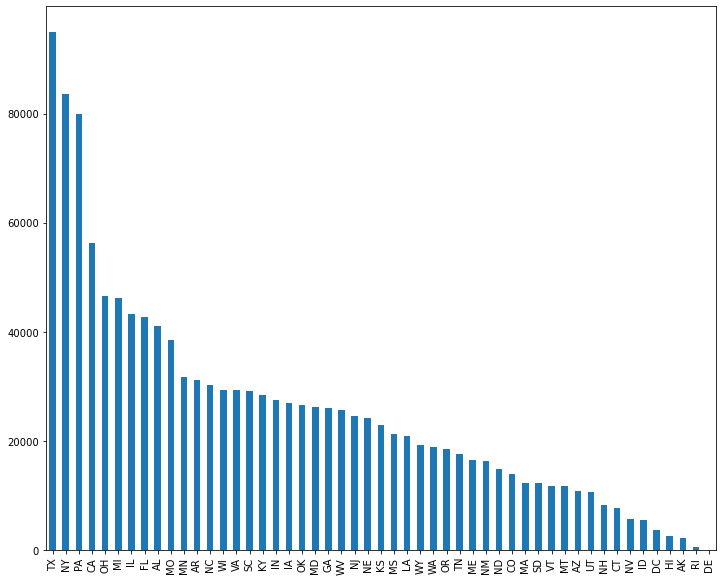

In [34]:
# plot city uniques and counts
traindf['state'].value_counts().plot(kind='bar', figsize=(12, 10));


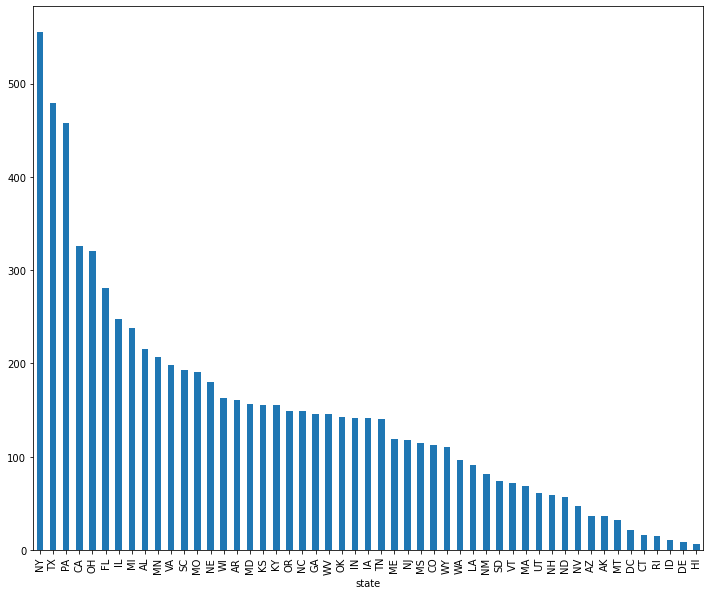

In [38]:
# p[lot count of fraud by state, descending order
traindf.groupby('state')['is_fraud'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 10));

## Checkpoint 2. What do we know so far?
-  what is the timeframe? 1st Jan 2019 - 31st Dec 2020 it was in the dataset description.
- is this data set inbalanced in more that one way? are ther more men than women or is all fraud in 1 city? etc..
- Are there any correlations that can be easily seen.
- What metrics do i need to be thinking about? am i more concerned with catching all the fraud even though i might flag some non fraudulent transactions? or am i ok misclassifying fraud so i do not interupt a users purchase on the live system?
    - if 99% is not fraud how reliable is my accuracy metric? 
    - I want to be thinking about Precision and F1. 
    - more to come on precision recall trade off.

- How many unique merchants and transactions per merchnats are there?